<a href="https://colab.research.google.com/github/2403a52009-bot/NLP/blob/main/nlp_asn_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF Based Analysis of Twitter Data

This notebook performs TF-IDF analysis on Twitter airline sentiment data, focusing on negative sentiment.

In [2]:

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load Dataset
Upload `Tweets.csv` from Kaggle before running this cell.

In [4]:

df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]
df.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## Text Preprocessing

In [5]:

stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_tweet)
df.head()


,text,airline_sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


## Extract Negative Tweets

In [6]:

negative_tweets = df[df['airline_sentiment'] == 'negative']
negative_tweets.head()


,text,airline_sentiment,clean_text
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing
5,@VirginAmerica seriously would pay $30 a fligh...,negative,seriously would pay flight seats didnt playing...
15,@VirginAmerica SFO-PDX schedule is still MIA.,negative,sfopdx schedule still mia
17,@VirginAmerica I flew from NYC to SFO last we...,negative,flew nyc sfo last week couldnt fully sit seat ...


## TF-IDF Computation

In [7]:

vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(negative_tweets['clean_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()


,amp,bag,cancelled,customer,delayed,flight,gate,get,help,hours,im,late,one,plane,service,still,time,ua,united,would
0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.50347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.864013
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Top TF-IDF Terms

In [8]:

tfidf_scores = tfidf_df.sum().sort_values(ascending=False)
tfidf_scores


,0
flight,449.048715
get,183.713619
service,153.186040
time,145.415067
im,136.613483
cancelled,133.302446
customer,126.661101
plane,125.064887
bag,123.957025
delayed,114.880672


## Visualization

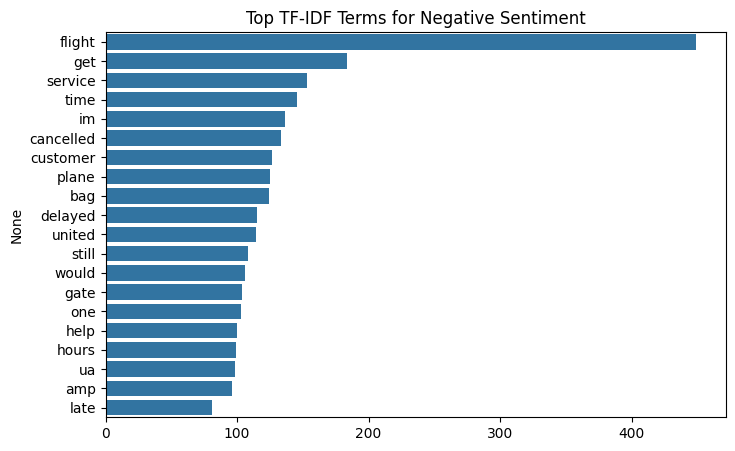

In [9]:

plt.figure(figsize=(8,5))
sns.barplot(x=tfidf_scores.values, y=tfidf_scores.index)
plt.title("Top TF-IDF Terms for Negative Sentiment")
plt.show()


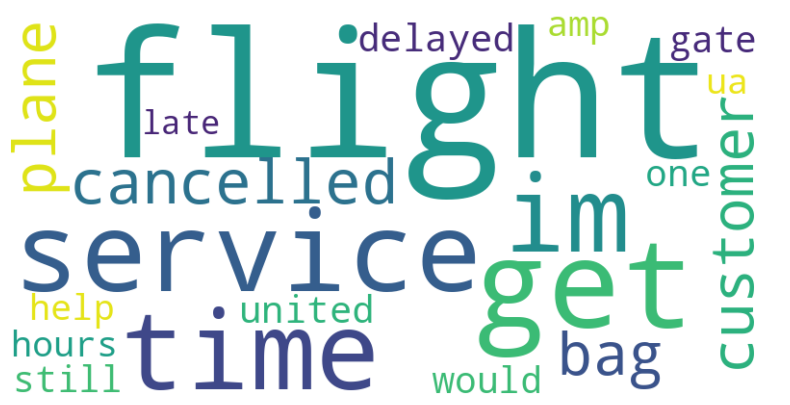

In [10]:

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## Explanatory Notes

**Aim:** Analyze Twitter airline reviews using TF-IDF to extract key negative sentiment vocabulary.

**Preprocessing:** Removes noise such as URLs, mentions, hashtags, and stopwords.

**TF-IDF:** Measures importance of words relative to the corpus.

**Negative Sentiment:** Focuses on complaints and dissatisfaction.

**Visualization:** Bar chart and word cloud highlight important negative terms.
